In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

jigsaw-toxic-comment-classification-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip -o jigsaw-toxic-comment-classification-challenge.zip -d ./toxic-comment-classification

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: ./toxic-comment-classification/sample_submission.csv.zip  
  inflating: ./toxic-comment-classification/test.csv.zip  
  inflating: ./toxic-comment-classification/test_labels.csv.zip  
  inflating: ./toxic-comment-classification/train.csv.zip  


In [6]:
!cd ./toxic-comment-classification

In [7]:
!unzip -o ./toxic-comment-classification/train.csv.zip -d ./toxic-comment-classification
!unzip -o ./toxic-comment-classification/test.csv.zip -d ./toxic-comment-classification
!unzip -o ./toxic-comment-classification/test_labels.csv.zip -d ./toxic-comment-classification
!unzip -o ./toxic-comment-classification/sample_submission.csv.zip -d ./toxic-comment-classification

Archive:  ./toxic-comment-classification/train.csv.zip
  inflating: ./toxic-comment-classification/train.csv  
Archive:  ./toxic-comment-classification/test.csv.zip
  inflating: ./toxic-comment-classification/test.csv  
Archive:  ./toxic-comment-classification/test_labels.csv.zip
  inflating: ./toxic-comment-classification/test_labels.csv  
Archive:  ./toxic-comment-classification/sample_submission.csv.zip
  inflating: ./toxic-comment-classification/sample_submission.csv  


In [8]:
!ls ./toxic-comment-classification

jigsaw-toxic-comment-classification-challenge.zip
sample_submission.csv
sample_submission.csv.zip
test.csv
test.csv.zip
test_labels.csv
test_labels.csv.zip
toxic-comment-classification
toxic_comment_model.pkl
train.csv
train.csv.zip
vectorizer.pkl
your_report.html


In [9]:
cd toxic-comment-classification/

/Users/shubhamgupta/MY_PYTHON/toxic-comment-classification


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the train dataset
df_train = pd.read_csv("train.csv.zip")
# Display the first few rows
print(df_train.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [11]:
print(df_train.describe())

               toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000  


In [12]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


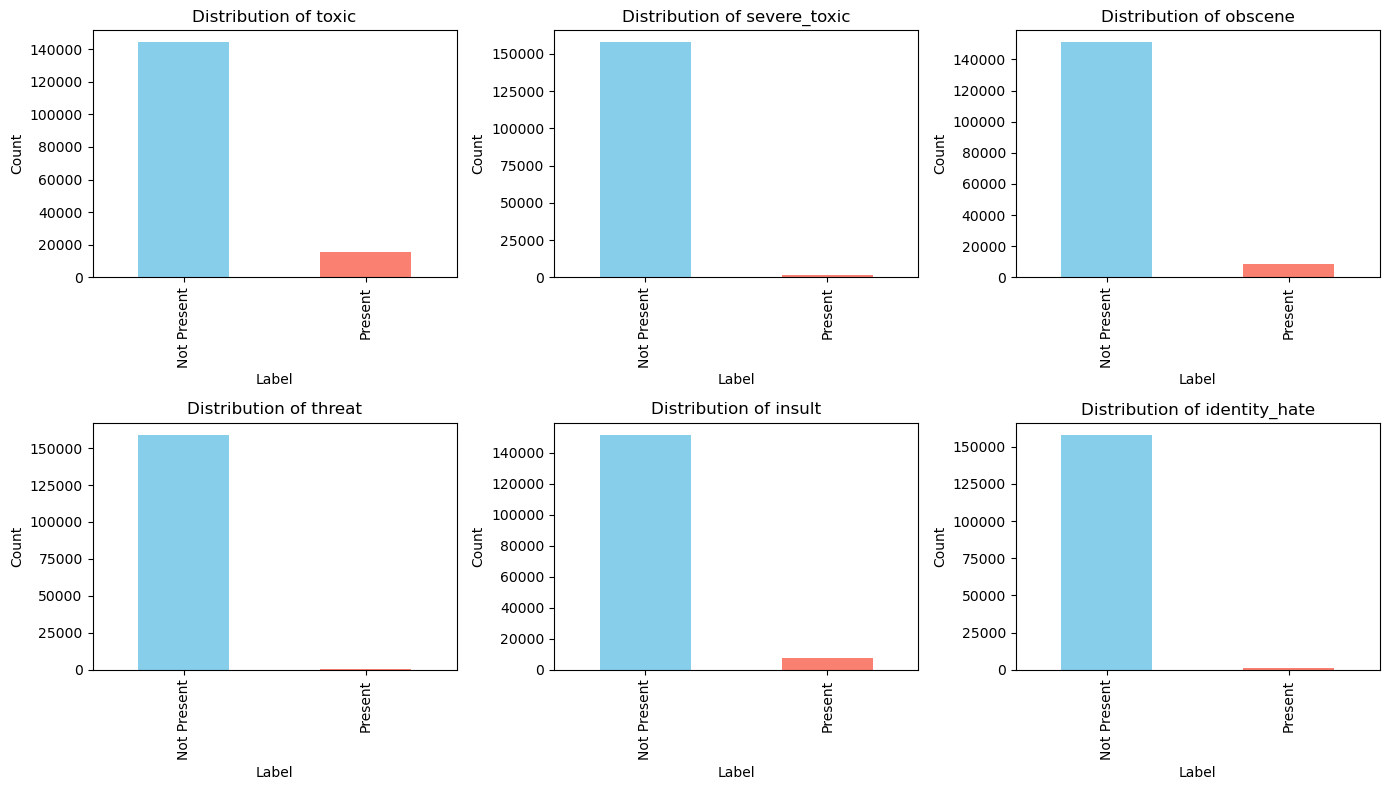

In [13]:
#bar plot
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
plt.figure(figsize=(14, 8))

for i, label in enumerate(labels):
    plt.subplot(2, 3, i + 1)
    df_train[label].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f'Distribution of {label}')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['Not Present', 'Present'])

plt.tight_layout()
plt.show()

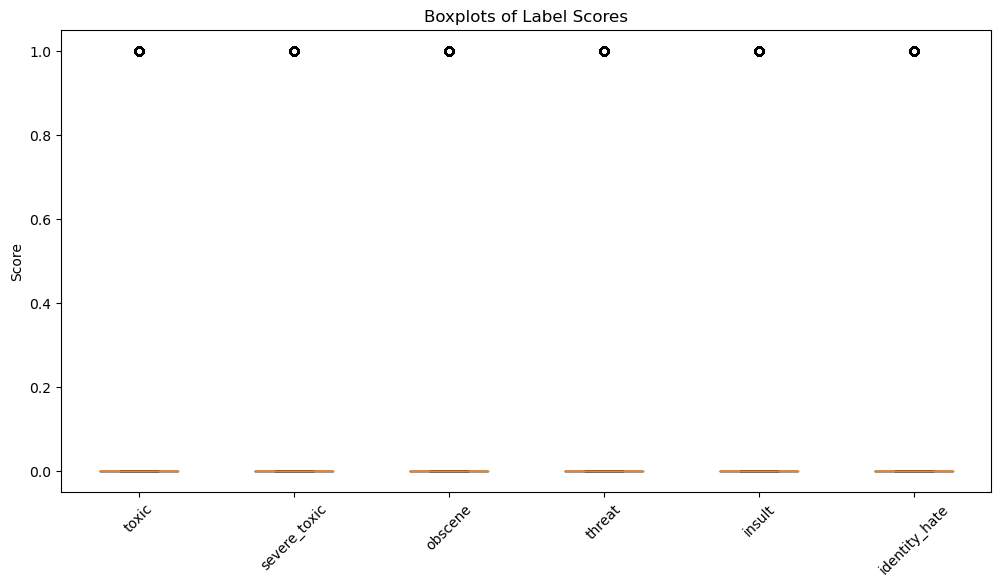

In [14]:
plt.figure(figsize=(12, 6))
data = [df_train[label] for label in labels]
plt.boxplot(data, labels=labels)
plt.title('Boxplots of Label Scores')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

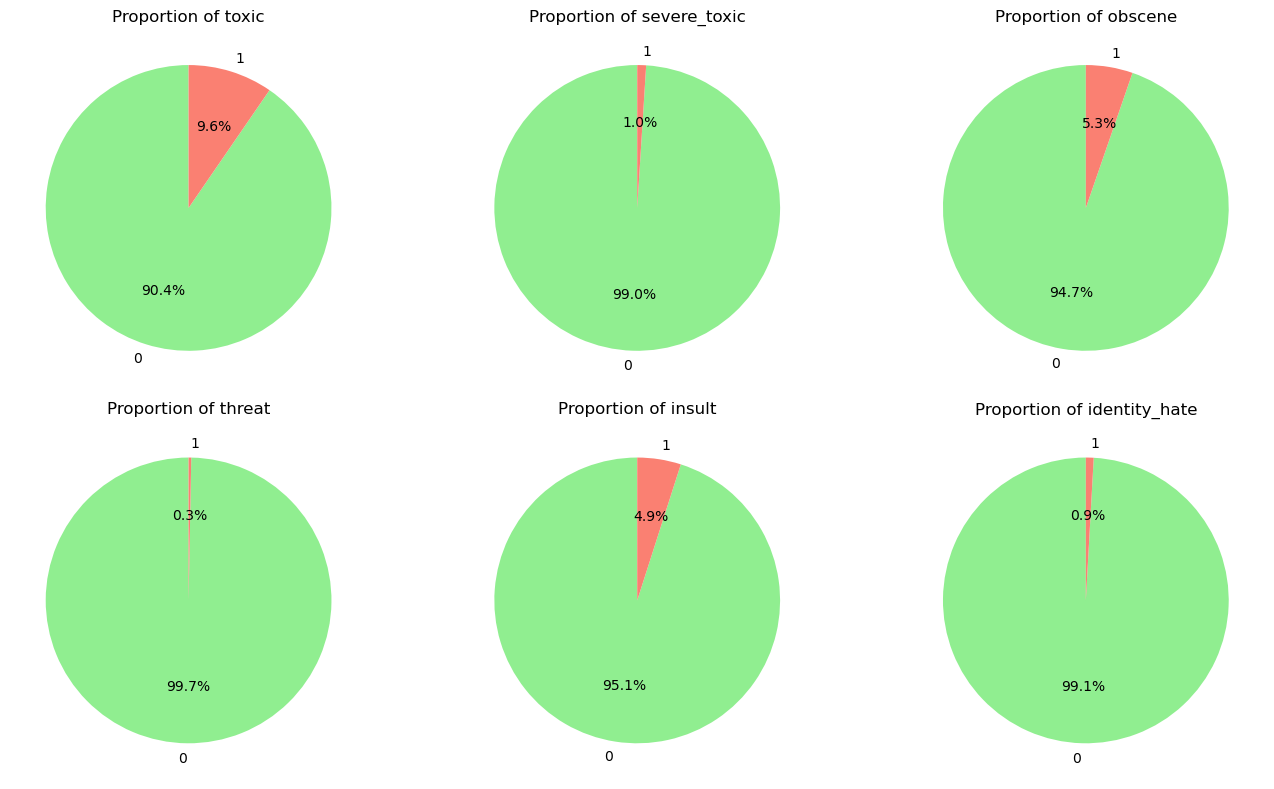

In [15]:
plt.figure(figsize=(14, 8))

for i, label in enumerate(labels):
    plt.subplot(2, 3, i + 1)
    df_train[label].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
    plt.title(f'Proportion of {label}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

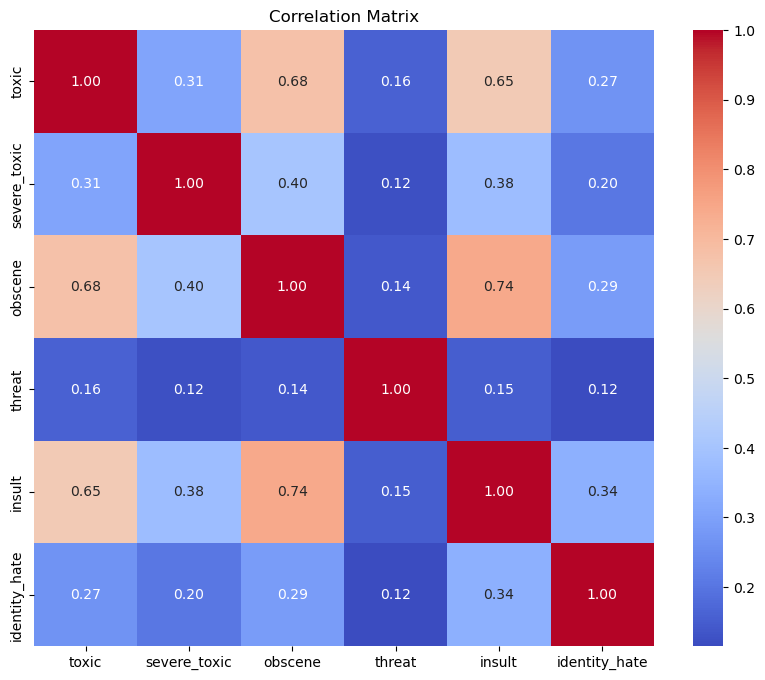

In [16]:
import seaborn as sns
corr = df_train[labels].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [17]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

# Generate a profiling report
profile = ProfileReport(df_train, title="Pandas Profiling Report", explorative=True)

# To view the report in a Jupyter notebook or save it as an HTML file
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
pip install pandas nltk

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (only need to run once)
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset
df = pd.read_csv('train.csv.zip')  # Change the path to your dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shubhamgupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shubhamgupta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    tokens = text.split()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    return ' '.join(tokens)


In [21]:
# Apply preprocessing
df['cleaned_comment_text'] = df['comment_text'].apply(preprocess_text)

# Display the first few rows to verify the changes
print(df[['comment_text', 'cleaned_comment_text']].head())

                                        comment_text  \
0  Explanation\nWhy the edits made under my usern...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\nMore\nI can't make any real suggestions on ...   
4  You, sir, are my hero. Any chance you remember...   

                                cleaned_comment_text  
0  explanation edits made username hardcore metal...  
1  daww match background colour im seemingly stuc...  
2  hey man im really trying edit war guy constant...  
3  cant make real suggestion improvement wondered...  
4                sir hero chance remember page thats  


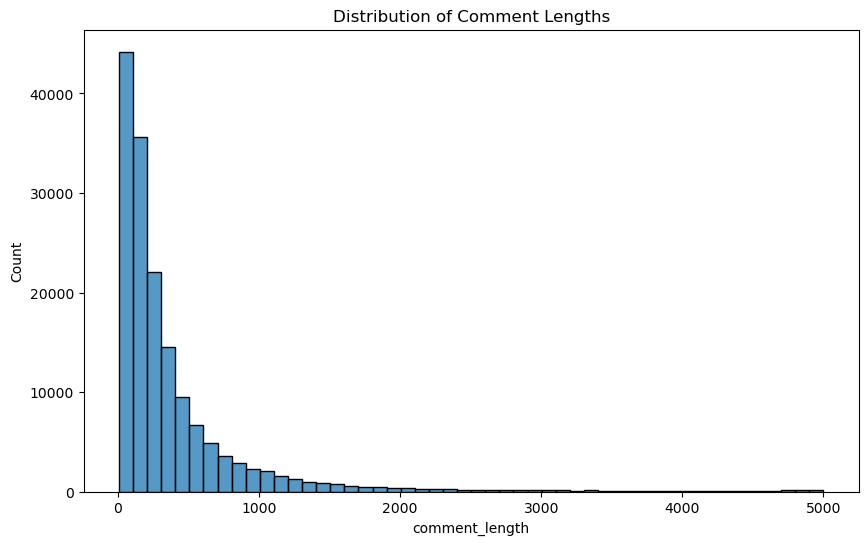

In [22]:
df_train['comment_length'] = df_train['comment_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_train['comment_length'], bins=50)
plt.title('Distribution of Comment Lengths')
plt.show()

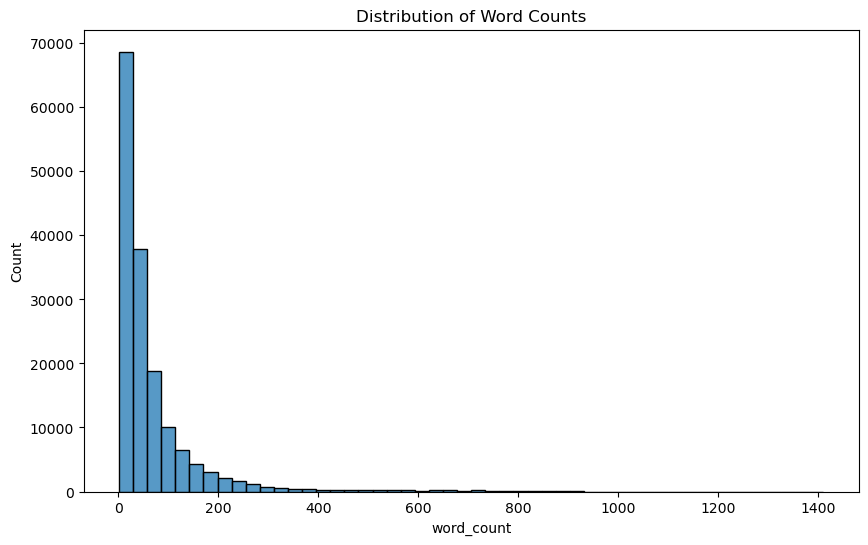

In [23]:
df_train['word_count'] = df_train['comment_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df_train['word_count'], bins=50)
plt.title('Distribution of Word Counts')
plt.show()

/Users/shubhamgupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


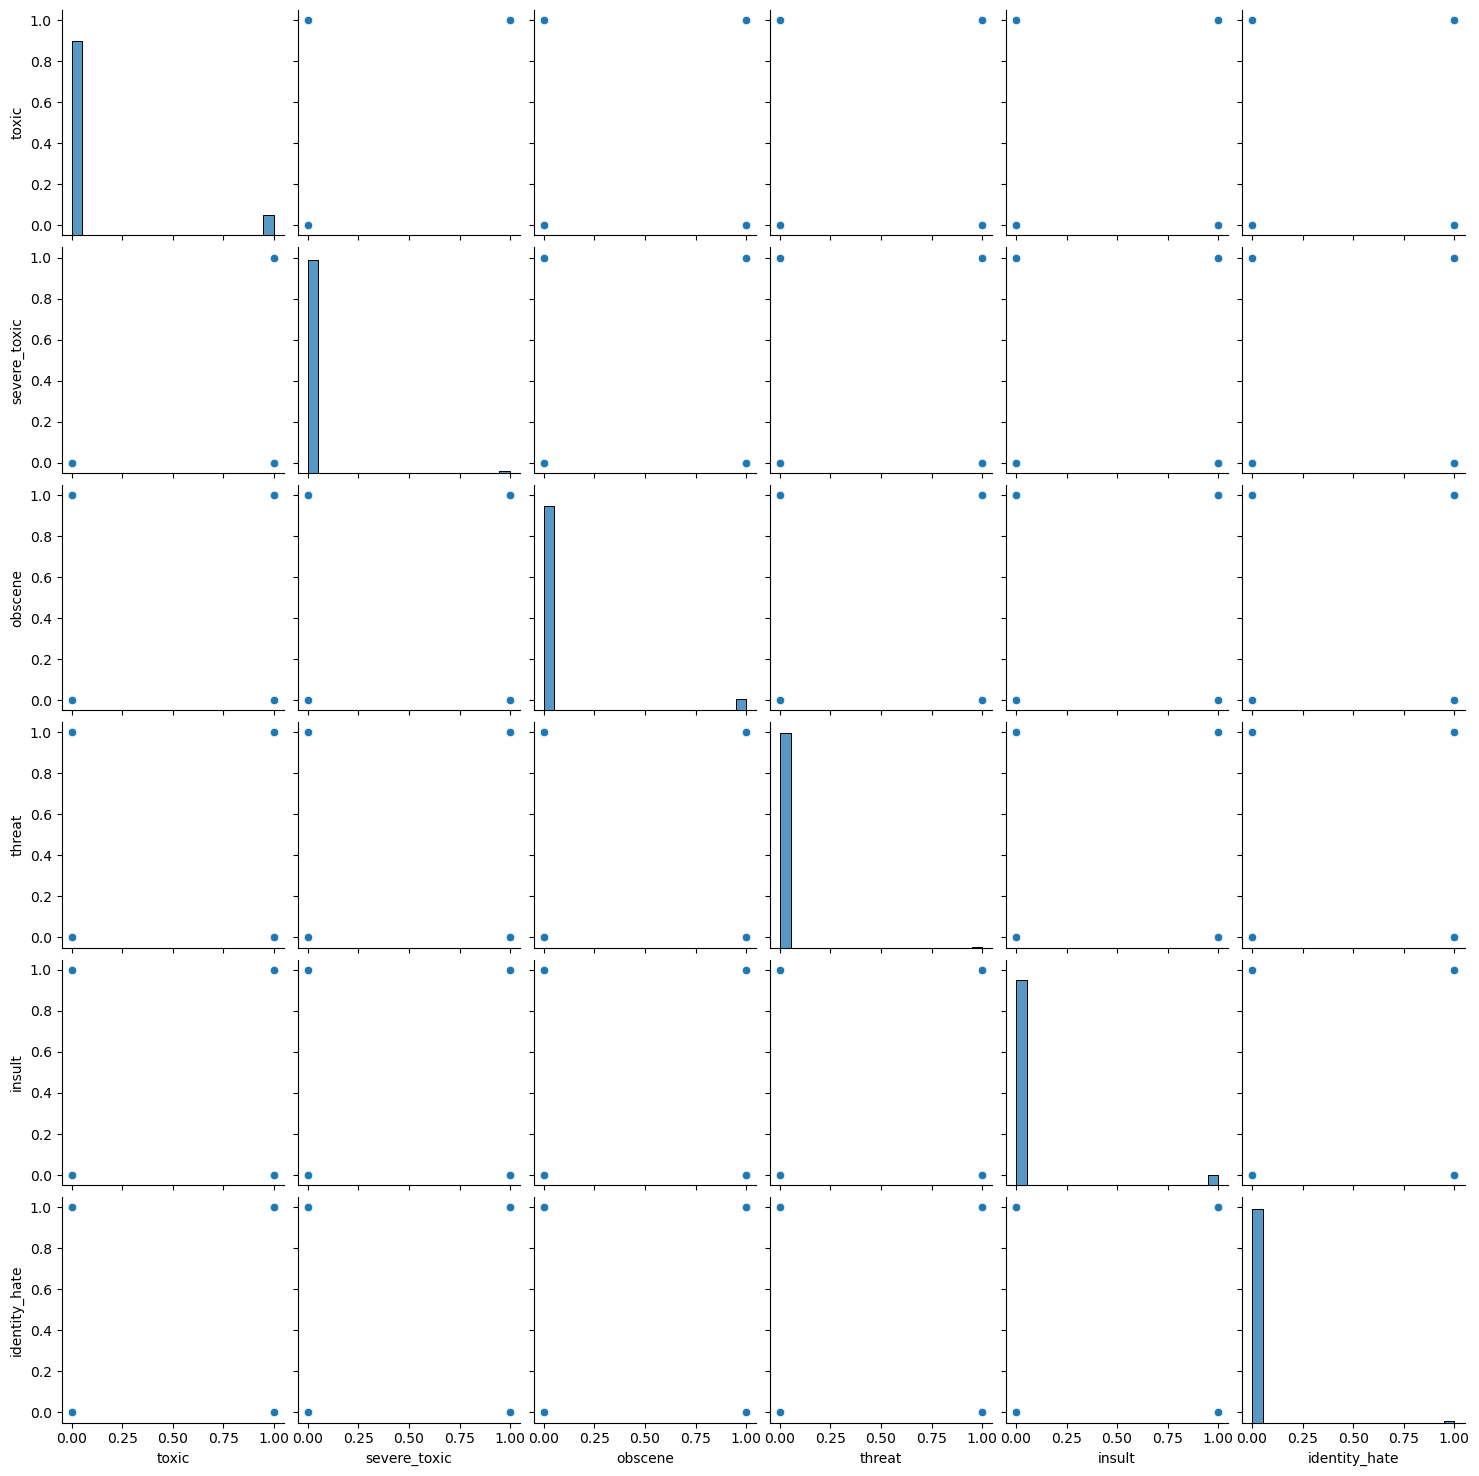

In [24]:
sns.pairplot(df_train, vars=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
plt.show()

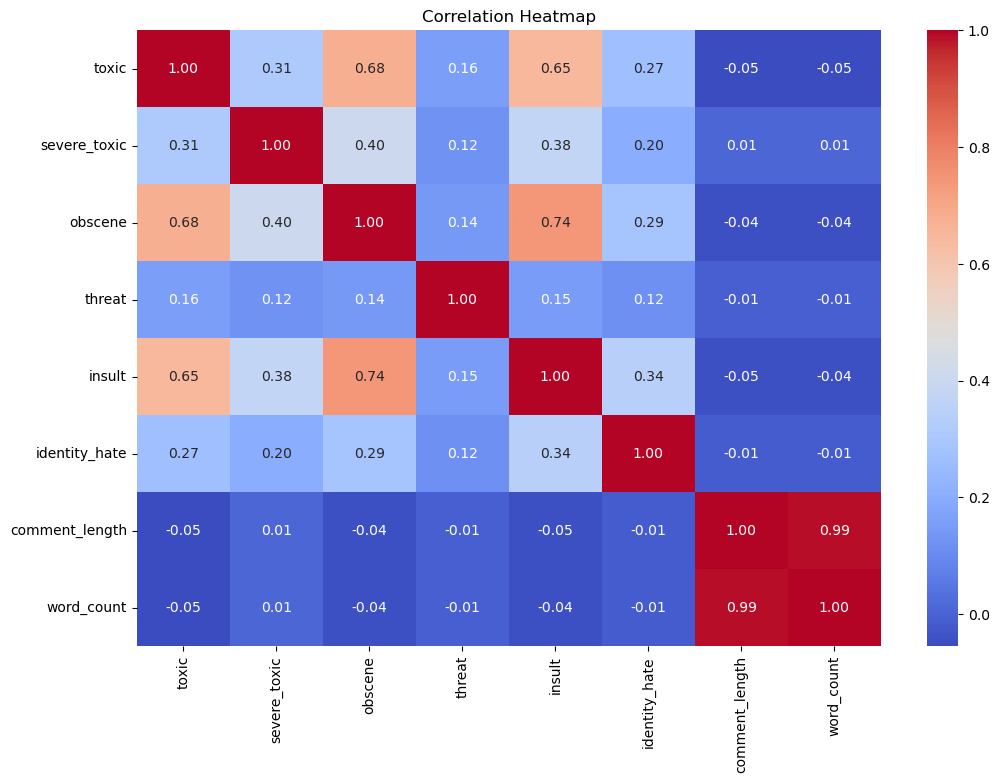

In [25]:
# Select only numeric columns
numeric_columns = df_train.select_dtypes(include=['float64', 'int64'])
# Calculate correlation matrix
correlation = numeric_columns.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
duplicates = df_train[df_train.duplicated(subset=['comment_text'])]
print(f'Number of duplicate comments: {duplicates.shape[0]}')

Number of duplicate comments: 0


In [27]:
!pip install scikit-learn imbalanced-learn

In [28]:
# Extract target columns
target_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = df[target_columns].values  # Get the values as a NumPy array

In [29]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [31]:
def preprocess_and_vectorize(df):
    vectorizer = TfidfVectorizer(max_features=15000, stop_words='english')
    X_vectorized = vectorizer.fit_transform(df['comment_text'])
    return X_vectorized

In [32]:
X_vectorized = preprocess_and_vectorize(df_train)

In [33]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=42)

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (119678, 15000)
X_test shape: (39893, 15000)
y_train shape: (119678, 6)
y_test shape: (39893, 6)


In [34]:
from imblearn.over_sampling import ADASYN
# Initialize ADASYN
adasyn = ADASYN(random_state=42)

# Prepare to hold resampled datasets
X_train_balanced_list = []
y_train_balanced_list = []

# Iterate through each label and apply ADASYN
for i in range(y_train.shape[1]):  # Loop over each label
    print(f"Balancing for label {i}...")
    
    # Get the current label's binary classification
    y_current_label = y_train[:, i]
    
    # Only proceed if there are at least two classes in the current label
    if len(np.unique(y_current_label)) > 1:
        # Apply ADASYN
        X_resampled, y_resampled = adasyn.fit_resample(X_train, y_current_label)

        # Collect balanced data
        X_train_balanced_list.append(X_resampled)
        y_train_balanced_list.append(y_resampled)
    else:
        print(f"Skipping label {i} due to a single-class situation.")
        # If there's only one class, append the original data
        X_train_balanced_list.append(X_train)
        y_train_balanced_list.append(y_current_label)

# Convert lists of arrays to single sparse matrix
from scipy.sparse import vstack

# Stack all the balanced features vertically
X_train_balanced = vstack(X_train_balanced_list)

# Concatenate all the balanced labels into a single array
y_train_balanced = np.concatenate(y_train_balanced_list)

# Print the shapes of the balanced datasets
print("Balanced training data shape:", X_train_balanced.shape)
print("Balanced labels shape:", y_train_balanced.shape)

Balancing for label 0...
Balancing for label 1...
Balancing for label 2...
Balancing for label 3...
Balancing for label 4...
Balancing for label 5...
Balanced training data shape: (1385113, 15000)
Balanced labels shape: (1385113,)


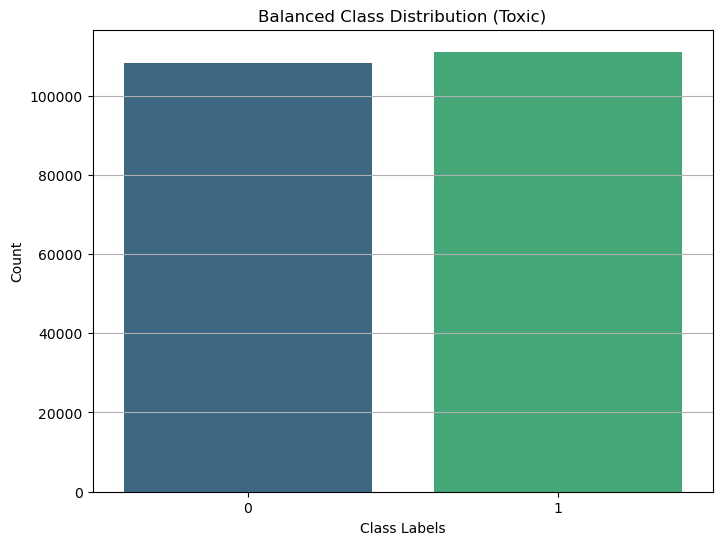

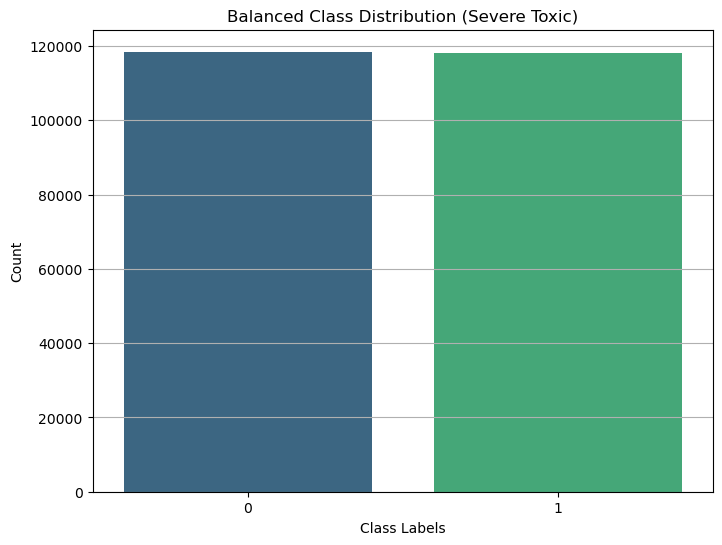

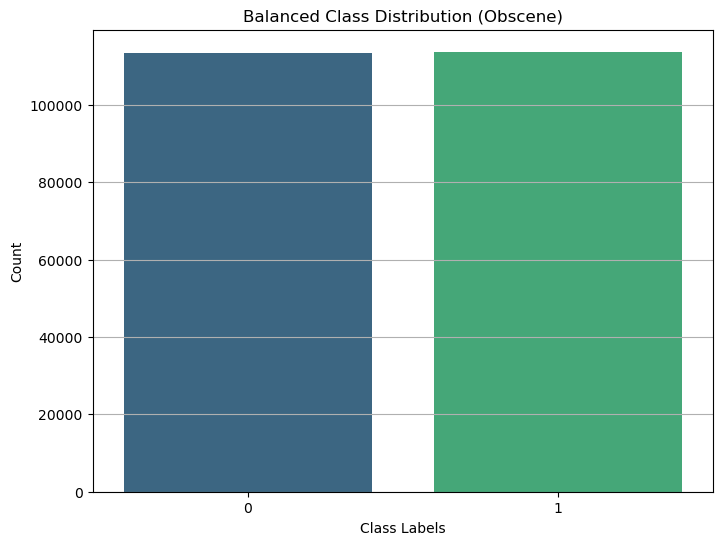

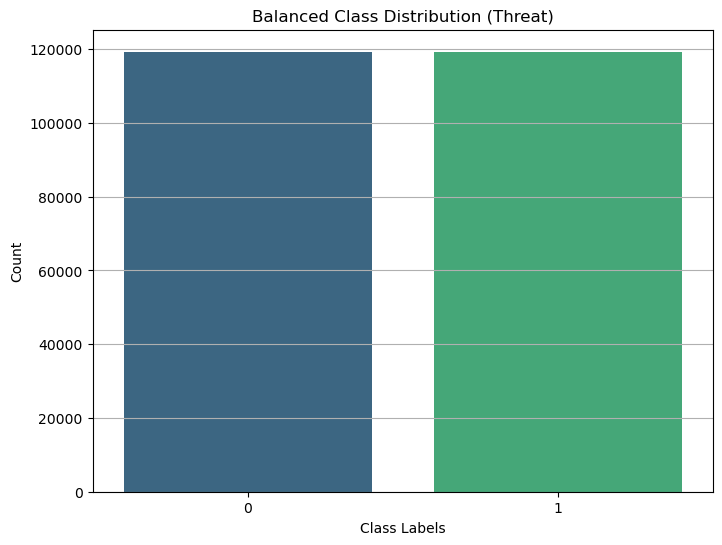

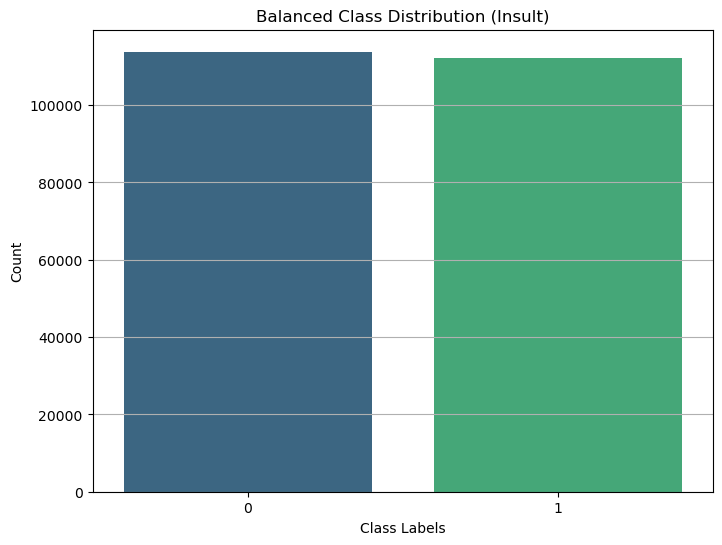

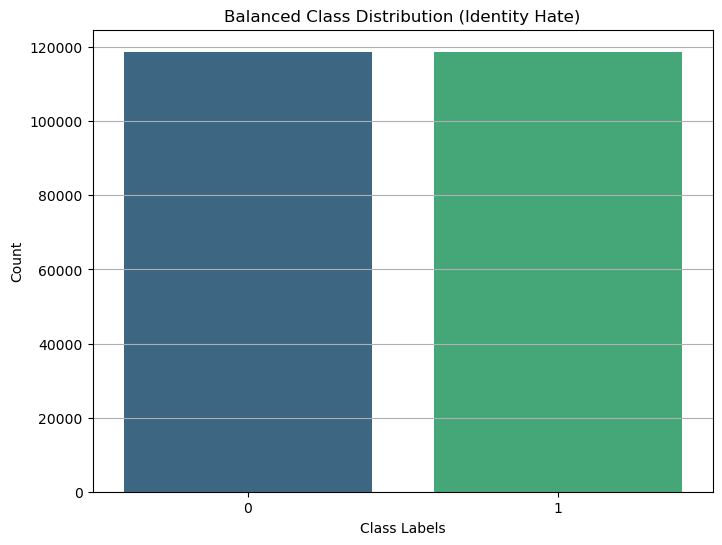

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_class_distribution(y, title):
    """
    Plot the distribution of classes in the given labels.

    Parameters:
    - y: Array of class labels.
    - title: Title for the plot.
    """
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y, palette='viridis')
    plt.title(title)
    plt.xlabel('Class Labels')
    plt.ylabel('Count')
    plt.xticks(ticks=np.arange(len(np.unique(y))), labels=np.unique(y), rotation=0)
    plt.grid(axis='y')
    plt.show()

# Assuming you have balanced each label and stored them in separate variables
toxic_balanced = y_train_balanced_list[0]  # Using the first element for toxic
severe_toxic_balanced = y_train_balanced_list[1]  # Second for severe toxic
obscene_balanced = y_train_balanced_list[2]  # Third for obscene
threat_balanced = y_train_balanced_list[3]  # Fourth for threat
insult_balanced = y_train_balanced_list[4]  # Fifth for insult
identity_hate_balanced = y_train_balanced_list[5]  # Sixth for identity hate

# Visualize each label without reshaping
plot_class_distribution(toxic_balanced, 'Balanced Class Distribution (Toxic)')
plot_class_distribution(severe_toxic_balanced, 'Balanced Class Distribution (Severe Toxic)')
plot_class_distribution(obscene_balanced, 'Balanced Class Distribution (Obscene)')
plot_class_distribution(threat_balanced, 'Balanced Class Distribution (Threat)')
plot_class_distribution(insult_balanced, 'Balanced Class Distribution (Insult)')
plot_class_distribution(identity_hate_balanced, 'Balanced Class Distribution (Identity Hate)')


In [36]:
print(toxic_balanced)

[0 0 0 ... 1 1 1]


In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multioutput import MultiOutputClassifier

# Assuming y_train_balanced_list contains your balanced labels
# Find the minimum size among all label arrays and the feature set
min_size = min([y.shape[0] for y in y_train_balanced_list] + [X_train.shape[0]])

# Truncate all label arrays to the same size
y_train_balanced_truncated = [y[:min_size] for y in y_train_balanced_list]

# Combine the balanced labels vertically and transpose to get shape (samples, labels)
y_train_balanced = np.vstack(y_train_balanced_truncated).T

# Truncate features to match the smallest label size
X_train_balanced = X_train[:min_size]  # Ensure features have the same number of rows as labels

# Ensure both X_train_balanced and y_train_balanced have the same number of samples
print(f"Shape of X_train_balanced: {X_train_balanced.shape}")
print(f"Shape of y_train_balanced: {y_train_balanced.shape}")

# Split into training and test sets
X_train_final, X_test, y_train_final, y_test = train_test_split(X_train_balanced, y_train_balanced, test_size=0.25, random_state=42)

# Initialize and train the Gradient Boosting model using MultiOutputClassifier for multi-label
gb_model = MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, random_state=42))
gb_model.fit(X_train_final, y_train_final)

# Predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy for each class:")
for i, label in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    accuracy = accuracy_score(y_test[:, i], y_pred[:, i])
    print(f"{label}: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']))

Shape of X_train_balanced: (119678, 15000)
Shape of y_train_balanced: (119678, 6)
Accuracy for each class:
toxic: 0.94
severe_toxic: 0.99
obscene: 0.98
threat: 1.00
insult: 0.97
identity_hate: 0.99

Classification Report:
               precision    recall  f1-score   support

        toxic       0.94      0.41      0.57      2868
 severe_toxic       0.44      0.21      0.28       287
      obscene       0.90      0.62      0.73      1560
       threat       0.32      0.08      0.13       107
       insult       0.82      0.44      0.57      1462
identity_hate       0.43      0.19      0.27       269

    micro avg       0.86      0.44      0.58      6553
    macro avg       0.64      0.32      0.43      6553
 weighted avg       0.85      0.44      0.58      6553
  samples avg       0.04      0.03      0.03      6553



/Users/shubhamgupta/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shubhamgupta/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shubhamgupta/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(re

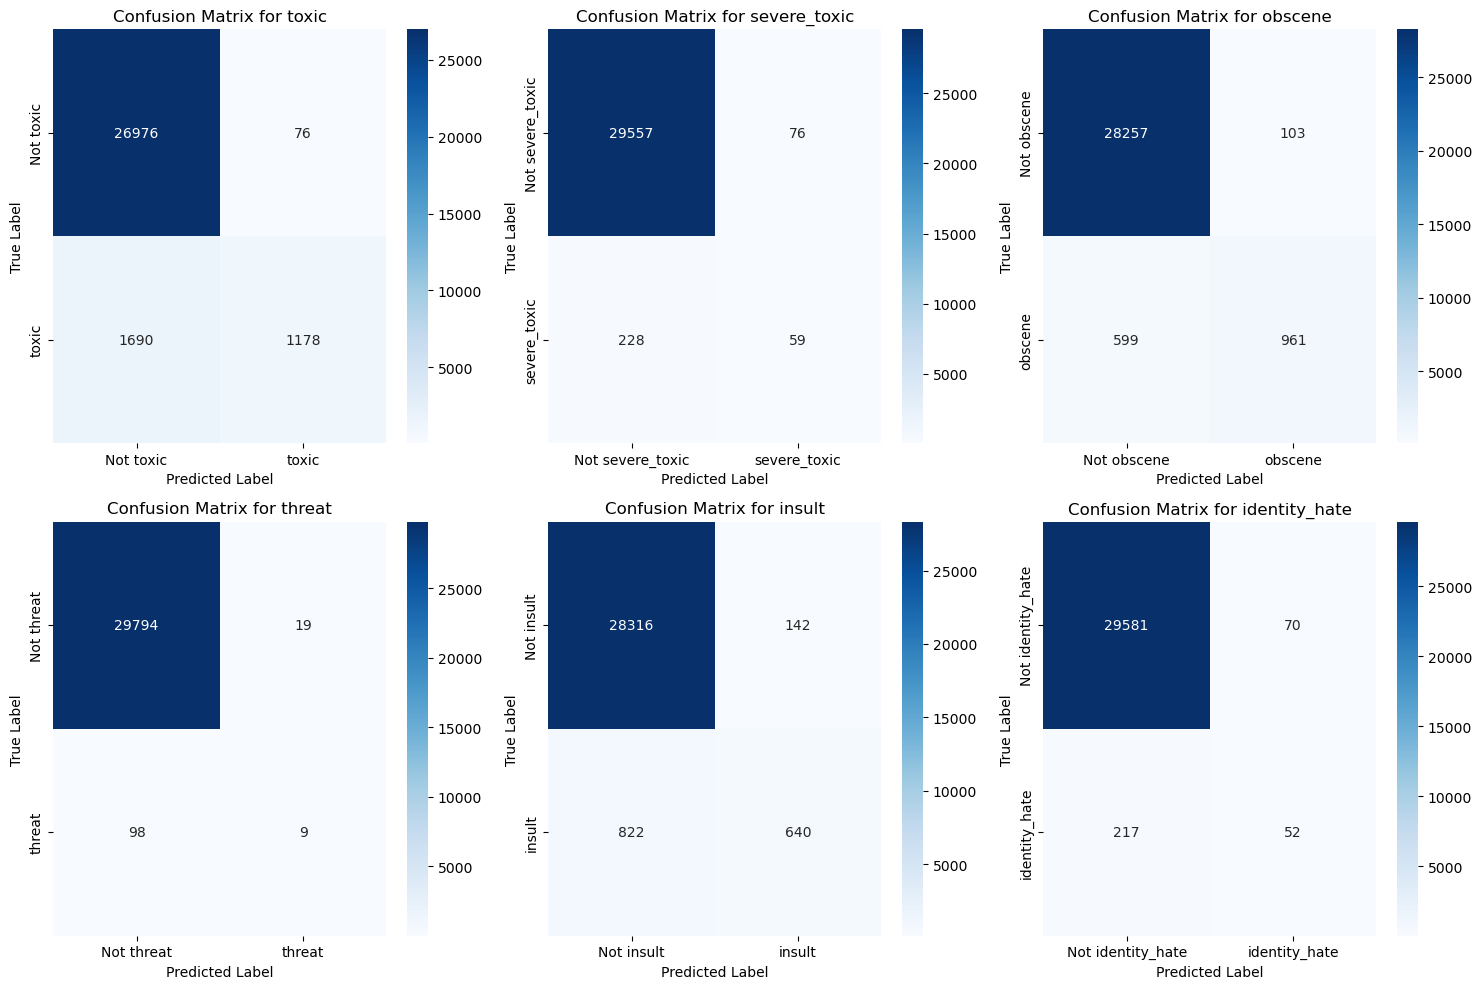

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix for each label
def plot_confusion_matrices(y_true, y_pred, labels):
    num_labels = len(labels)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the figure size as needed
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    for i, label in enumerate(labels):
        # Calculate confusion matrix
        cm = confusion_matrix(y_true[:, i], y_pred[:, i])
        
        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues',
                    xticklabels=['Not ' + label, label],
                    yticklabels=['Not ' + label, label])
        
        axes[i].set_title(f'Confusion Matrix for {label}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot confusion matrices
plot_confusion_matrices(y_test, y_pred, ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
